<a href="https://www.kaggle.com/code/raneemabdo/classification-with-tree-based-model?scriptVersionId=145672753" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.tree import export_graphviz,plot_tree
from IPython.display import Image,display

In [2]:
kyp=pd.read_csv("/kaggle/input/kyphosis-dataset/kyphosis.csv")
kyp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [3]:
kyp.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


**EDA**

In [4]:
kyp.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,81.0,83.654321,58.104251,1.0,26.0,87.0,130.0,206.0
Number,81.0,4.049383,1.619423,2.0,3.0,4.0,5.0,10.0
Start,81.0,11.493827,4.883962,1.0,9.0,13.0,16.0,18.0


In [5]:
kyp.Kyphosis.value_counts()

Kyphosis
absent     64
present    17
Name: count, dtype: int64

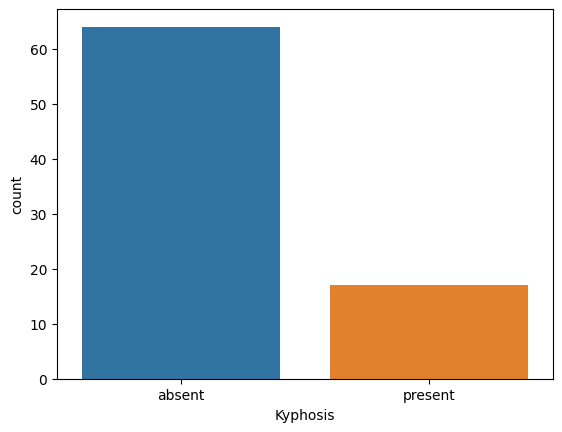

In [6]:
sns.countplot(x='Kyphosis',data=kyp)
plt.show()

**splitting data**

In [7]:
x=kyp.drop('Kyphosis',axis=1)
y=kyp['Kyphosis']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10,stratify=y) #unbalance data use stratify

In [8]:
dt=DecisionTreeClassifier(max_depth=2,random_state=10)
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 10,
 'splitter': 'best'}

In [9]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=10)

In [10]:
preds=dt.predict(x_test)

In [11]:
acc=accuracy_score(preds,y_test)
print("test set accuracy ",acc)
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

test set accuracy  0.7142857142857143
[[14  3]
 [ 3  1]]
              precision    recall  f1-score   support

      absent       0.82      0.82      0.82        17
     present       0.25      0.25      0.25         4

    accuracy                           0.71        21
   macro avg       0.54      0.54      0.54        21
weighted avg       0.71      0.71      0.71        21



In [12]:
features=list(kyp.columns[1:])
features

['Age', 'Number', 'Start']

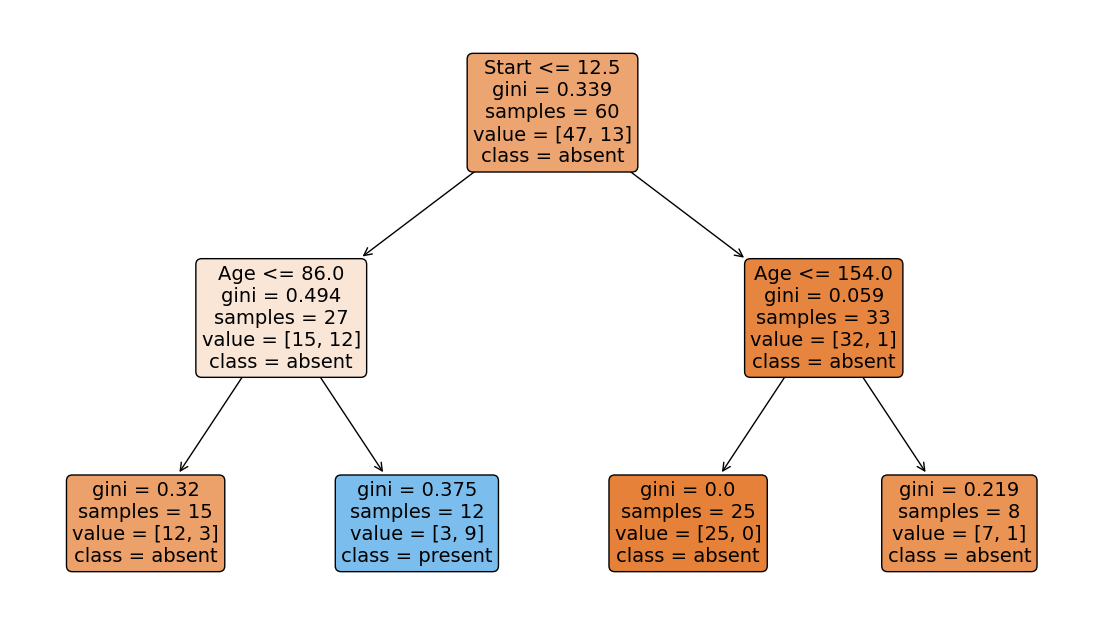

In [13]:
plt.figure(figsize=(14,8))
_=plot_tree(dt,feature_names=features,rounded=True,fontsize=14,class_names=['absent','present'],filled=True)